In [1]:
# Make module from local packages importable
import os
import sys
nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import nibabel as nib

In [4]:
images_folder = "/mnt/isegpu2/local/ADNI_AIBL/ADNI_AIBL_T1_normalized/train_NC_AD/"

# Load and show one image

In [6]:
image_label = "A169891_normalized.nii.gz"
image_path = os.path.join(images_folder, image_label)

In [7]:
im = nib.load(image_path)
data = im.get_data()

In [8]:
data.shape

(91, 109, 91)

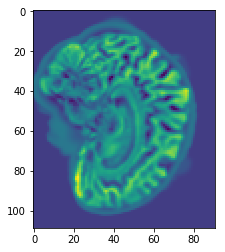

In [9]:
plt.imshow(data[50])

# Compare images

In [11]:
# Load meta information
file_path = "../data/raw/csv/adni_aibl__ad_hc.csv"
df = pd.read_csv(file_path)
records = df.to_dict('records')